In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, precision_recall_fscore_support, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
import time
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

##  In this case data science techniques is used for separating sport articles
### Text documents are one of the richest sources of data for people and businesses. Advances in communication technologies have led to the fact that almost every Internet user is overloaded with a huge amount of information.
### Specifically in this case the division of articles into objective and subjective ones is considered. For example, whenever sports fans seek out facts or objective information to make educated guesses or bets on some game winners, they end up studying numerous articles that blend between facts and opinions and are subjectively shaped by the style and affiliation of the writers.
### Subjectivity is difficult to identify in articles because it can embody several forms. This can be expressed or inferred. It can also be conveyed in different sentence structures and through different words and phrases with different intensity. Sometimes it is difficult to determine whether a certain part of the article represents the author's opinion or is it just a report on someone else's opinion.
### We are inspired by this idea and believe that this separation will help to spend less time and effort on the processing and filtering of articles
### Our model can act as a text subjectivity analyzer, which classifies sports articles only on the basis of the syntactic analysis carried out by the creators of the dataset. They have revealed their models of the classifier, giving good accuracy. We want to improve classification accuracy by analyzing the dataset, processing it, and creating our own classifier model using machine learning

In [3]:
sport_articles = pd.read_excel("sport_articles_features.xlsx")
print(sport_articles.shape)
sport_articles.head() 
sport_articles[sport_articles.isnull().any(axis=1)]

(1000, 62)


,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity


In [4]:
sport_articles.columns

Index(['TextID', 'URL', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentence1st', 'sentencelast', 'txtcomplexity'],
      dtype='object')

In [5]:
# load the data and visualising some info
# we have 1000 rows and 62 columns with parameters (input + output)
# and data doesn't contain null elements

### Split the data frame into X (inputs) and y (outputs) 

### Change all binary fields to 0 or 1 

In [6]:
sport_articles["Label"] = sport_articles.Label.map({"objective":1, "subjective":0})
sport_articles.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,1,109,0,1,7,9,0,5,...,0,3,0,11,0,0,0,0,1,18
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,1,309,21,4,1,19,1,4,...,0,10,0,13,0,14,9,1,1,14
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,1,149,6,1,8,14,0,5,...,0,2,0,8,0,3,2,1,1,18
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,1,305,18,5,7,26,0,10,...,0,8,3,13,1,7,1,1,1,20
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,1,491,23,8,33,47,0,12,...,0,16,2,34,1,5,6,1,1,24


### Objective article - describing of facts
### Subjective article - autor's opinion

## Now we need to check whether our data is balanced 

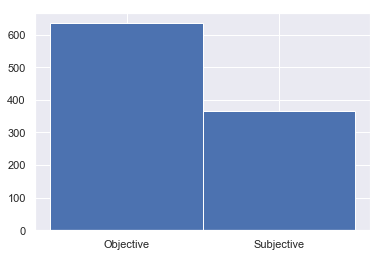

In [7]:
# using plot for explore how many objective and subjective articles have data

plt.bar([0,1], [sport_articles.Label.sum(), sport_articles.Label.count() - sport_articles.Label.sum()], width = 1)
plt.xticks([0,1], ('Objective', 'Subjective'))
plt.show()

#### the sample can be considered as balanced

In [8]:
sport_articles.dtypes

TextID               object
URL                  object
Label                 int64
totalWordsCount       int64
semanticobjscore      int64
semanticsubjscore     int64
CC                    int64
CD                    int64
DT                    int64
EX                    int64
FW                    int64
INs                   int64
JJ                    int64
JJR                   int64
JJS                   int64
LS                    int64
MD                    int64
NN                    int64
NNP                   int64
NNPS                  int64
NNS                   int64
PDT                   int64
POS                   int64
PRP                   int64
PRP$                  int64
RB                    int64
RBR                   int64
RBS                   int64
RP                    int64
SYM                   int64
                      ...  
VB                    int64
VBD                   int64
VBG                   int64
VBN                   int64
VBP                 

## We consider features 'TextID' and 'URL' unuseful and delete them

In [9]:
sport_articles = sport_articles.drop(['TextID', 'URL'], axis=1)

# Let's normalize our dataset

In [10]:
from sklearn.preprocessing import StandardScaler, normalize

# drop text type and check which type have other values


predictors = list(sport_articles.copy().drop('Label', axis=1))

sport_articles_norm = pd.DataFrame(normalize(sport_articles[predictors]),columns=sport_articles.columns[1:])
sport_articles_norm = pd.concat([sport_articles_norm, sport_articles[['Label']]], axis = 1)
sport_articles_norm.head()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity,Label
0,0.929555,0.000000,0.008528,0.059696,0.076752,0.000000,0.042640,0.068224,0.051168,0.000000,...,0.025584,0.000000,0.093808,0.000000,0.000000,0.000000,0.000000,0.008528,0.153505,1
1,0.934734,0.063526,0.012100,0.003025,0.057476,0.003025,0.012100,0.105876,0.069576,0.000000,...,0.030250,0.000000,0.039325,0.000000,0.042350,0.027225,0.003025,0.003025,0.042350,1
2,0.928822,0.037402,0.006234,0.049870,0.087272,0.000000,0.031169,0.093506,0.068571,0.000000,...,0.012467,0.000000,0.049870,0.000000,0.018701,0.012467,0.006234,0.006234,0.112207,1
3,0.941134,0.055542,0.015428,0.021600,0.080228,0.000000,0.030857,0.114170,0.064799,0.003086,...,0.024685,0.009257,0.040114,0.003086,0.021600,0.003086,0.003086,0.003086,0.061714,1
4,0.936382,0.043863,0.015257,0.062934,0.089633,0.000000,0.022885,0.116333,0.068655,0.000000,...,0.030513,0.003814,0.064841,0.001907,0.009535,0.011443,0.001907,0.001907,0.045770,1


## Lets build correlation matrix and analyze it

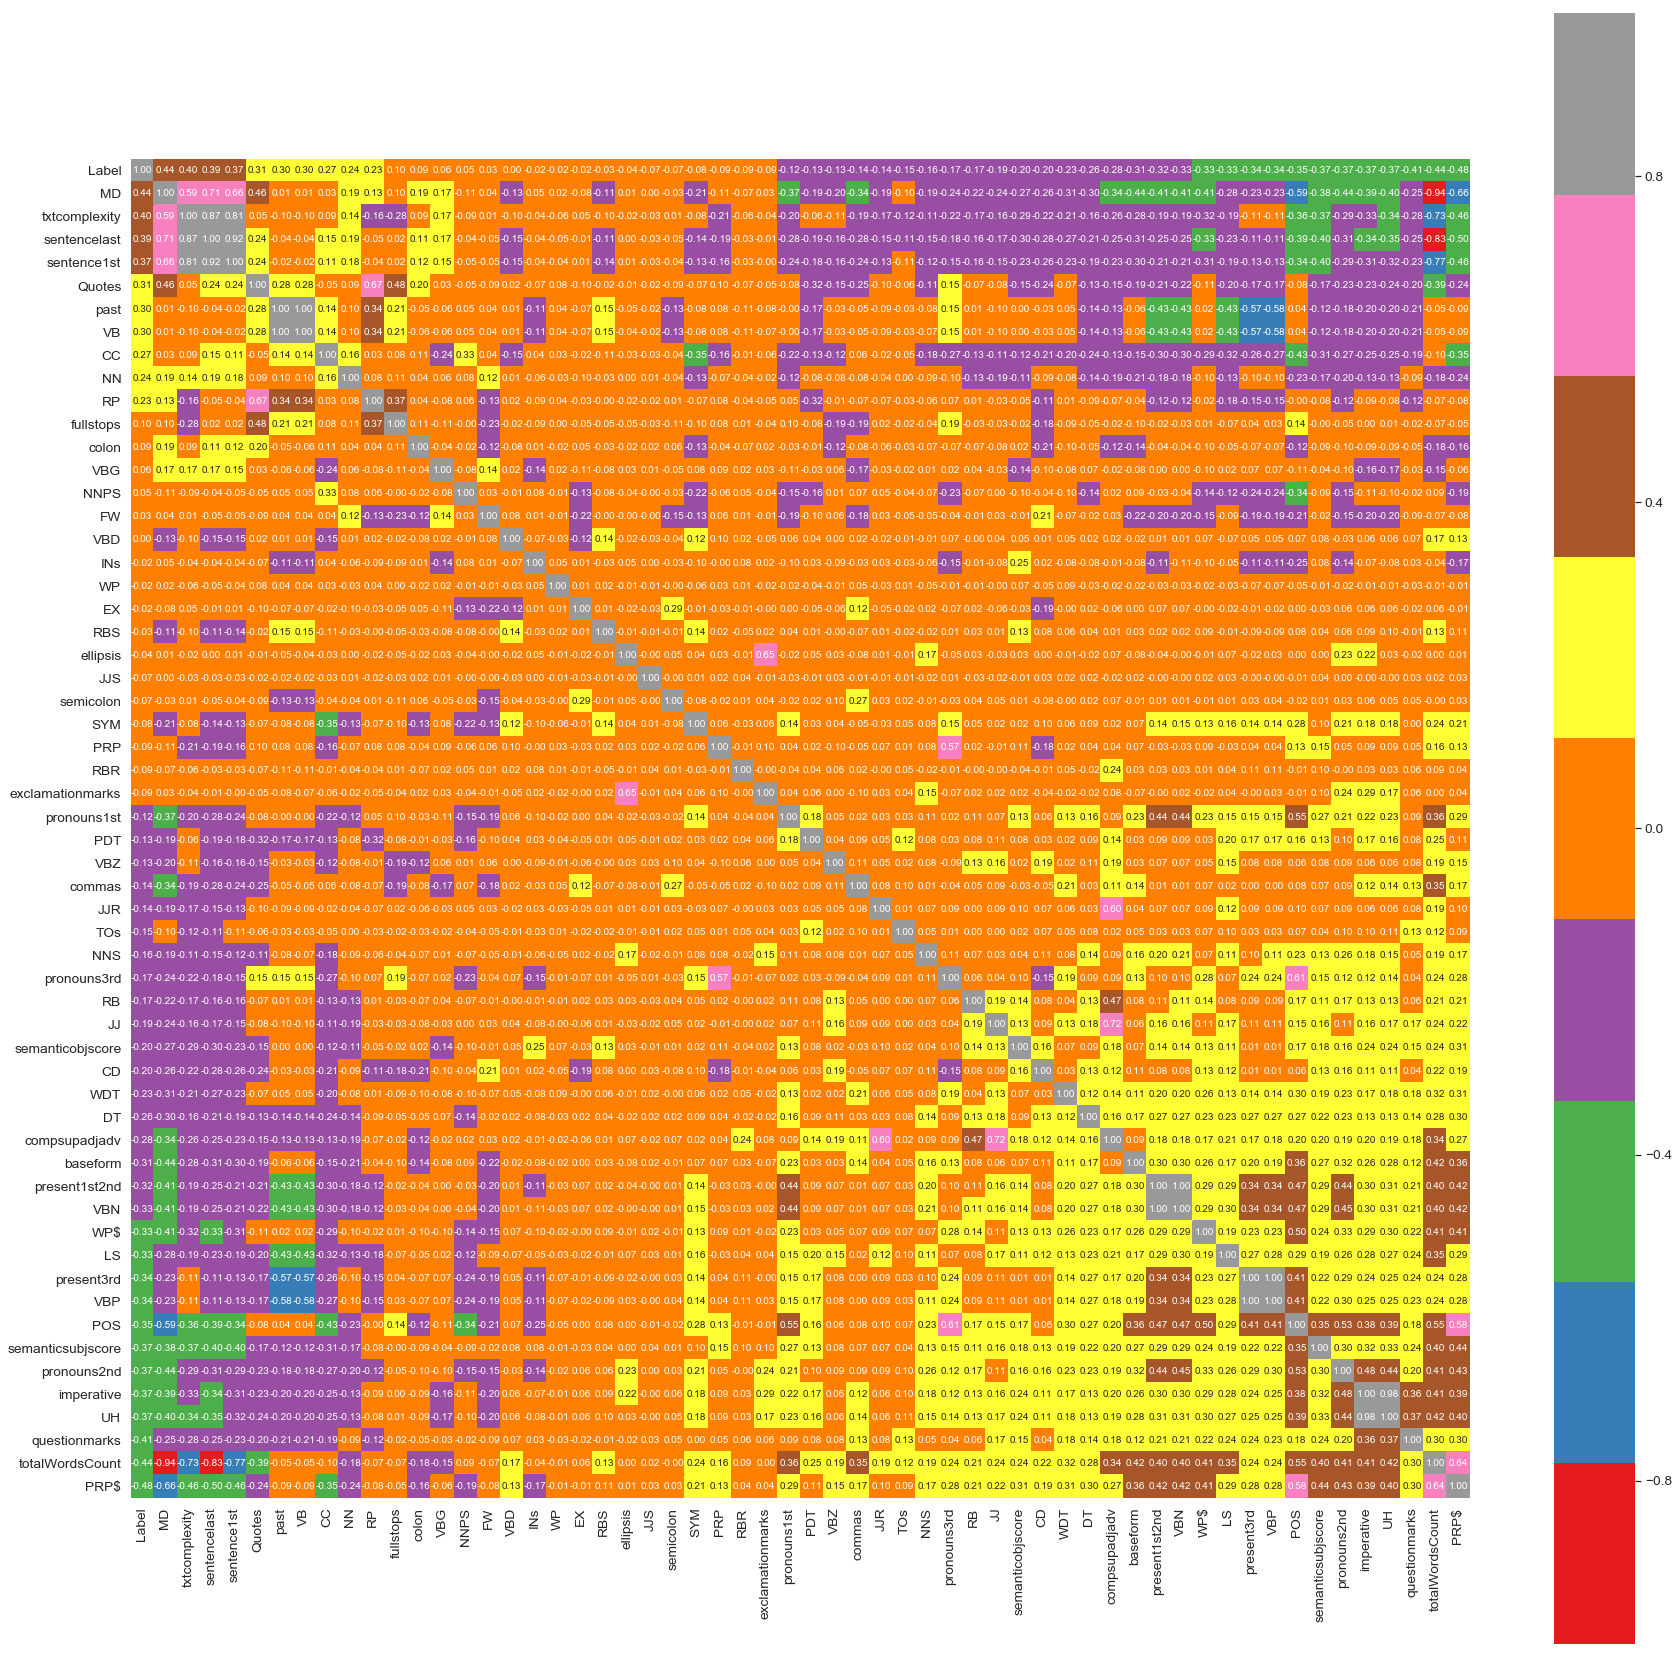

In [35]:
corrmat = sport_articles_norm.corr()
#print(list(corrmat))
k = 60 #number of variables for heatmap

cols1 = corrmat.nlargest(4, 'Label')['Label'].index
cols = corrmat.nlargest(k, 'Label', keep='last')['Label'].index


cm = sport_articles_norm[cols].corr()

plt.figure(figsize=(30,30))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, cmap='Set1' ,annot=True,vmin=-1,vmax =1, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

## there are parameters that correlate with each other with value 1, so we can keep just one of them

In [36]:
sport_articles_norm4 = sport_articles_norm.drop(['VBP', 'VBN', 'VB'], axis=1)
X = sport_articles_norm4.drop('Label', axis=1)
y = sport_articles_norm4.Label

## We split our data for train and test (train - 70%, test - 30%)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Then we try to implement SVM classifier first
## We need to find hyperparameters using GridSearch

In [38]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['accuracy', 'roc_auc','f1_weighted']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    
    
    warnings.filterwarnings('ignore')

# Tuning hyper-parameters for accuracy
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for roc_auc
Best parameters set found on development set:
{'C': 1000, 'kernel': 'linear'}
# Tuning hyper-parameters for f1_weighted
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}


In [39]:
my_svm = SVC(C=100, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('accuracy: ', np.round(accuracy_score(y_test, y_pred)* 100, 3), "%")

my_svm = SVC(C=1000, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('roc auc: ', np.round(roc_auc_score(y_test, y_pred)* 100, 3), "%")

my_svm = SVC(C=100, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

accuracy:  85.0 %
roc auc:  83.936 %
f1 score:  84.937 %


## f1 score is 84.9% 
## Lets compare our result with the result of the dataset authours 

# Analysing given article and thinking logically, we decided to take the following features for classification: 

In [11]:
sport_articles_norm1 = sport_articles_norm[['Label', 'Quotes', 'questionmarks', 'past', 'imperative', 'compsupadjadv', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'sentence1st', 'sentencelast', 'semanticobjscore', 'semanticsubjscore', 'PRP$', 'DT']]
X = sport_articles_norm1.drop('Label', axis=1)
y = sport_articles_norm1.Label

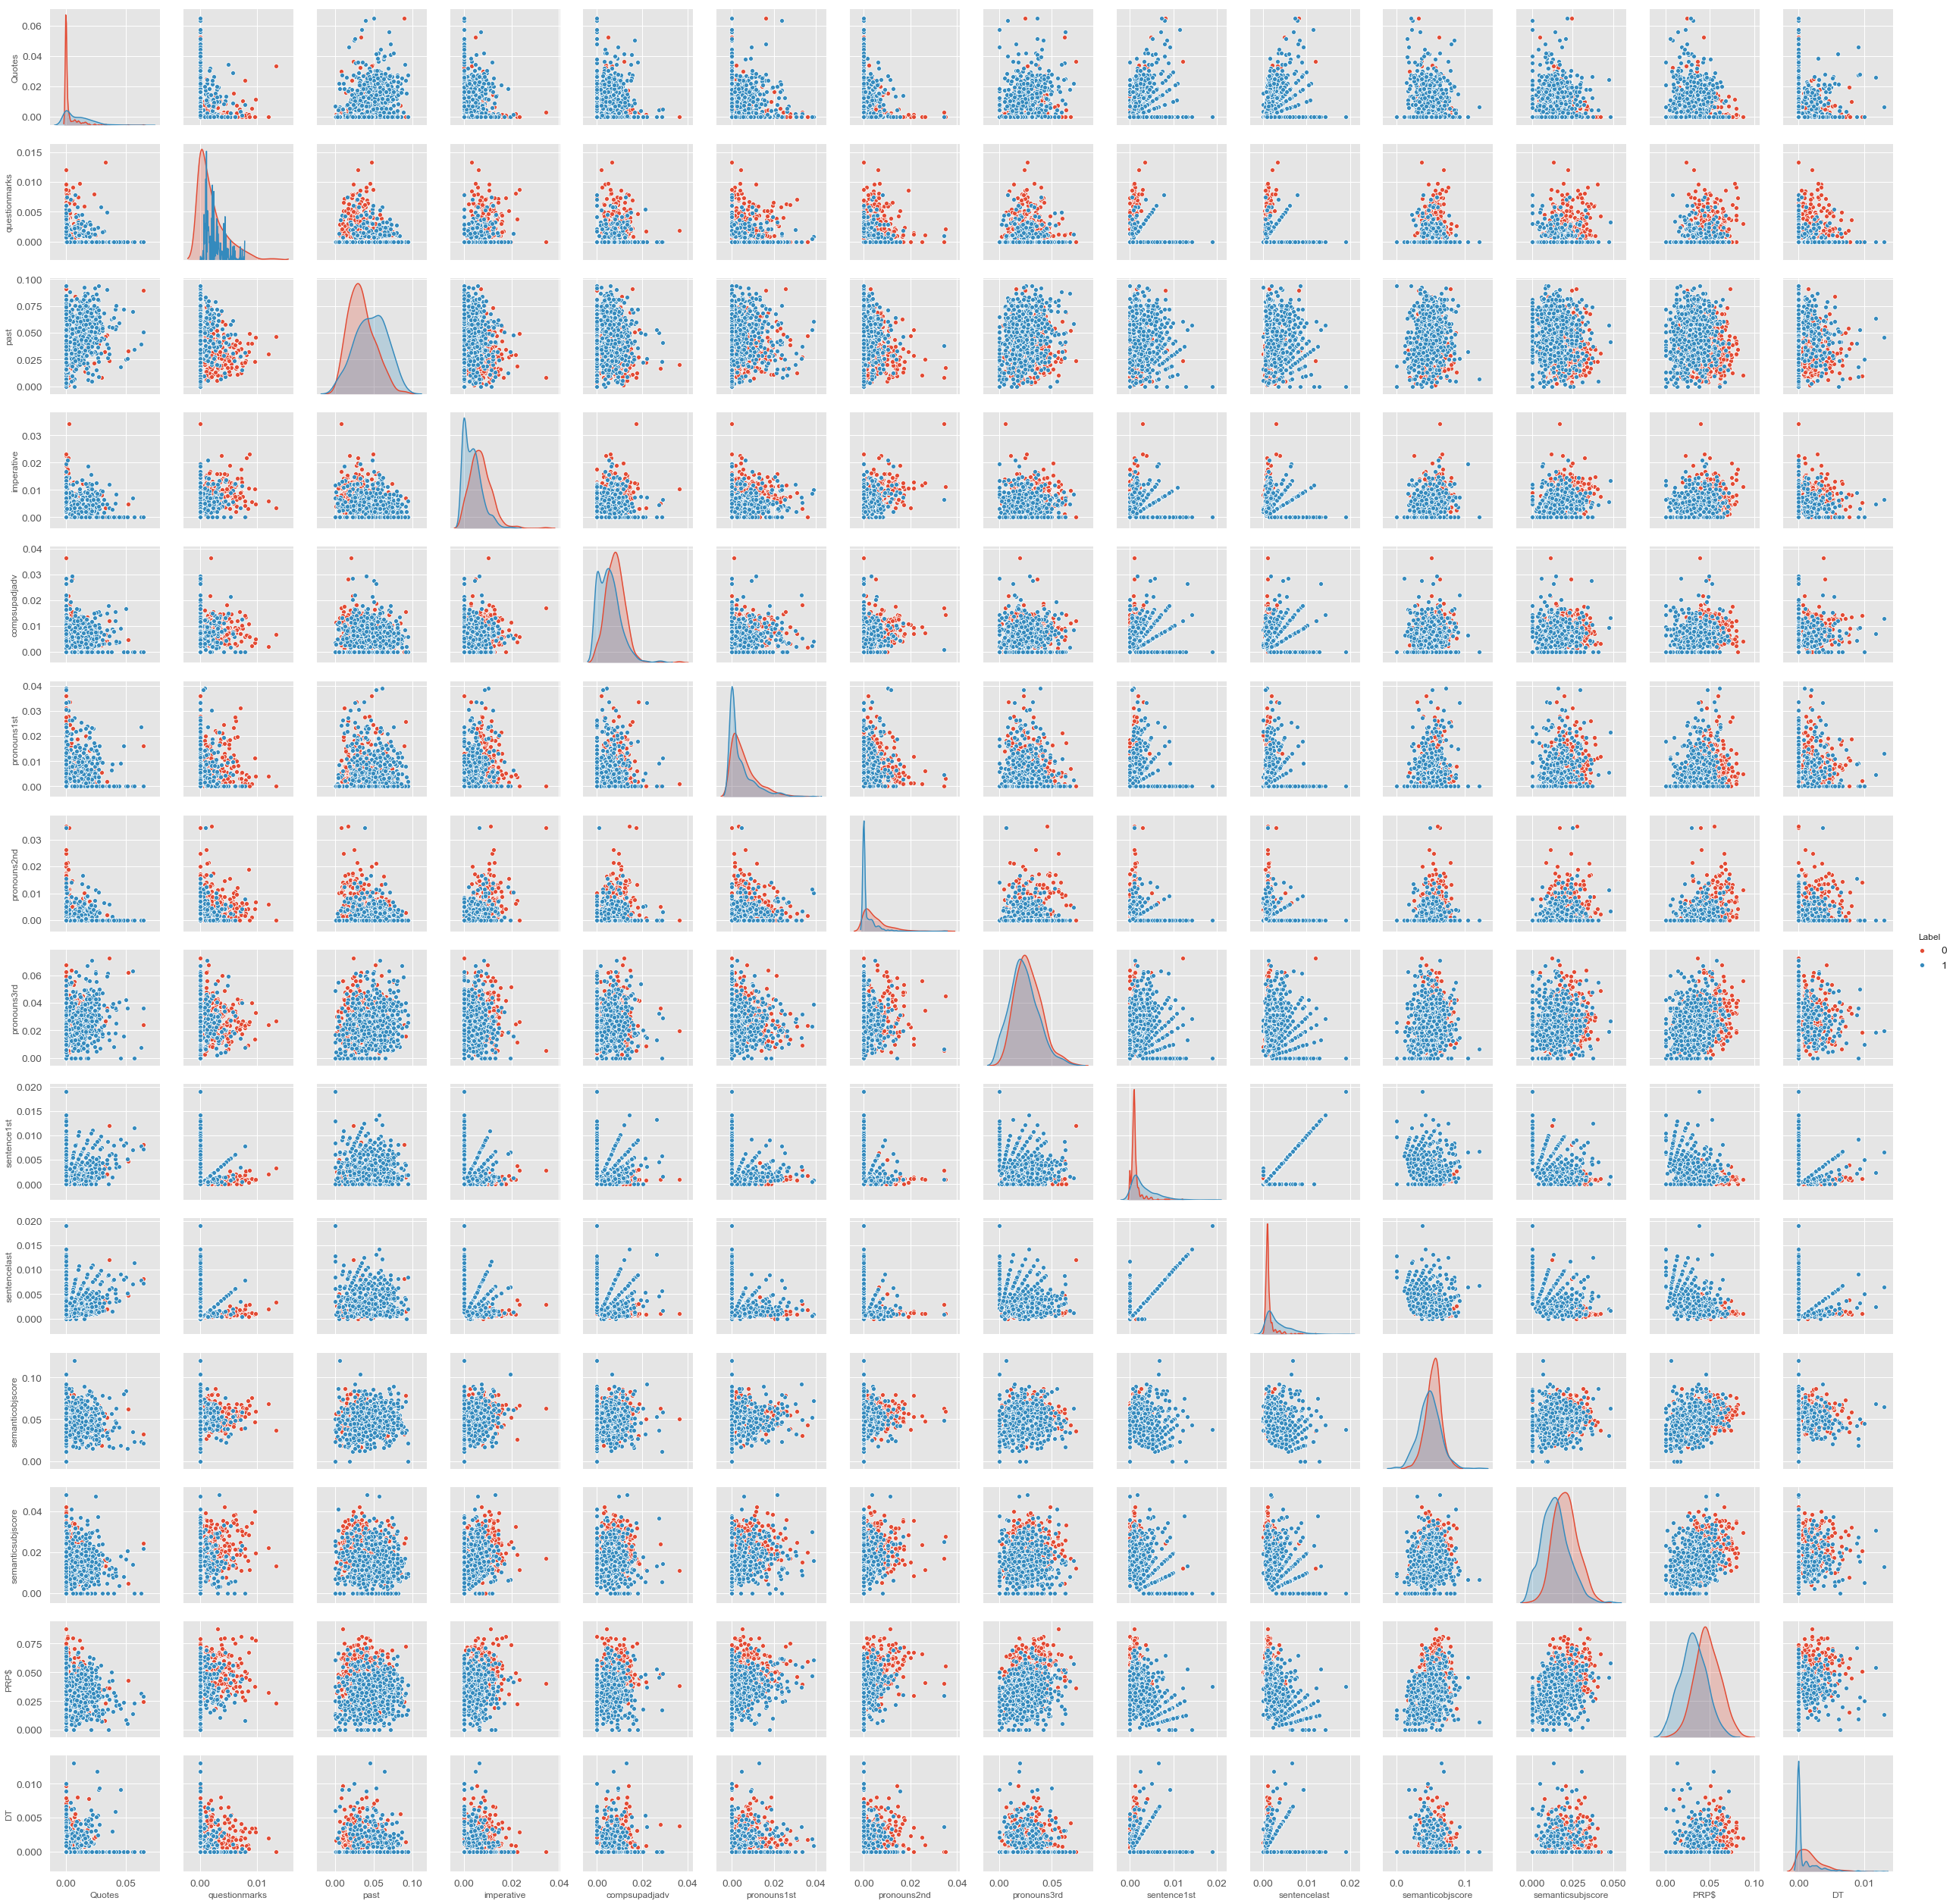

In [60]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

cols = ['Quotes', 'questionmarks', 'past', 'imperative', 'compsupadjadv', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'sentence1st', 'sentencelast', 'semanticobjscore', 'semanticsubjscore', 'PRP$', 'DT']

sns.pairplot(sport_articles_norm,
             x_vars = cols,
             y_vars = cols,
             hue = 'Label', 
             );

### We split our data for train and test (train - 70%, test - 30%)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Then we try to implement RandomForest Classifier

# First of all we have to find hyperparameters (using GridSearch)

In [13]:
t1 = time.time()
param_grid = { 
    "n_estimators": np.arange(10, 100, 5),
    "min_samples_leaf": [1, 2, 3, 4],
    "max_depth": [20, 30, 40, 50]
}
scores = ['accuracy', 'f1_weighted', 'roc_auc']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    clf = RandomForestClassifier(random_state=0)

    CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=score)
    CV_rfc.fit(X_train, y_train)
    print (CV_rfc.best_params_)
    print("time of grid search", str((time.time() - t1) / 60.), "mins")



# Tuning hyper-parameters for accuracy
{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 95}
time of grid search 1.9255903720855714 mins
# Tuning hyper-parameters for f1_weighted
{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 95}
time of grid search 3.6520045518875124 mins
# Tuning hyper-parameters for roc_auc
{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 25}
time of grid search 5.503233802318573 mins


In [16]:
clf = RandomForestClassifier(n_estimators=95, min_samples_leaf=2, max_depth = 20, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy: ', np.round(accuracy_score(y_pred, y_test)* 100, 3), "%")

clf = RandomForestClassifier(n_estimators=25, min_samples_leaf=4, max_depth = 20, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('roc_auc_score: ', np.round(roc_auc_score(y_test, y_pred)* 100, 3), "%")

clf = RandomForestClassifier(n_estimators=95, min_samples_leaf=2, max_depth = 20, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

accuracy:  80.0 %
roc_auc_score:  79.151 %
f1 score:  79.732 %


# Now we want to try another classifier: GradientBoosting e.g.

# Again we have to find hyperparameters (using GridSearch)

In [17]:
t1 = time.time()
param_grid = { 
    "n_estimators": np.arange(10, 100, 5),
    "min_samples_leaf": [1, 2, 3, 4],
    "max_depth": [20, 30, 40, 50]
}
clf = GradientBoostingClassifier(random_state=0)

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1_weighted')
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)
print("time of grid search", str((time.time() - t1) / 60.), "mins")

{'max_depth': 30, 'min_samples_leaf': 3, 'n_estimators': 40}
time of grid search 6.2233404835065205 mins


In [18]:
gb = GradientBoostingClassifier(min_samples_leaf= 3, n_estimators=40, max_depth=30, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

f1 score:  77.11 %


### f1 score became less 

# And one more classifier: SVM

In [19]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['accuracy', 'roc_auc','f1_weighted']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    
    
    warnings.filterwarnings('ignore')

# Tuning hyper-parameters for accuracy
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for roc_auc
Best parameters set found on development set:
{'C': 1000, 'kernel': 'linear'}
# Tuning hyper-parameters for f1_weighted
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}


In [20]:
my_svm = SVC(C=100, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('accuracy: ', np.round(accuracy_score(y_test, y_pred)* 100, 3), "%")

my_svm = SVC(C=1000,  kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('roc auc: ', np.round(roc_auc_score(y_test, y_pred)* 100, 3), "%")

my_svm = SVC(C=100,  kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

accuracy:  81.333 %
roc auc:  82.296 %
f1 score:  81.125 %


### f1 score higher with this classificator, but it is still less than our first approach

# Results on classifiing on emperically obtained features (14 from 59):
## RandomForest: 79.7%
## GradientBoost: 77.1 %
## SVM: 81.1%

## We think that we dropped too many columns that led us to lower result

# Now we want to calculate features weights 

In [21]:
X = sport_articles_norm.drop('Label', axis=1)
y = sport_articles_norm.Label

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
param_grid = { 
"n_estimators": np.arange(10, 100, 5),
"min_samples_leaf": [1, 2, 3, 4],
"max_depth": [20, 30, 40, 50]
}
scores = ['accuracy', 'f1_weighted', 'roc_auc']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)

    clf = RandomForestClassifier(random_state=0)

    CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=score)
    CV_rfc.fit(X_train, y_train)
    print (CV_rfc.best_params_)

# Tuning hyper-parameters for accuracy
{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 25}
# Tuning hyper-parameters for f1_weighted
{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 25}
# Tuning hyper-parameters for roc_auc
{'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 55}


## We obtain weights given by RandomForestClassifier to each feature
## And we desided to check classifier score for unchanged dataset

In [24]:
clf = RandomForestClassifier(n_estimators=25, max_depth = 20, min_samples_leaf=4, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy: ', np.round(accuracy_score(y_pred, y_test)* 100, 3), "%")

clf = RandomForestClassifier(n_estimators=55, max_depth = 20, min_samples_leaf=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('roc_auc_score: ', np.round(roc_auc_score(y_pred, y_test)* 100, 3), "%")

clf = RandomForestClassifier(n_estimators=25, max_depth = 20, min_samples_leaf=4, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

accuracy:  81.333 %
roc_auc_score:  82.798 %
f1 score:  80.894 %


# Feature selection 

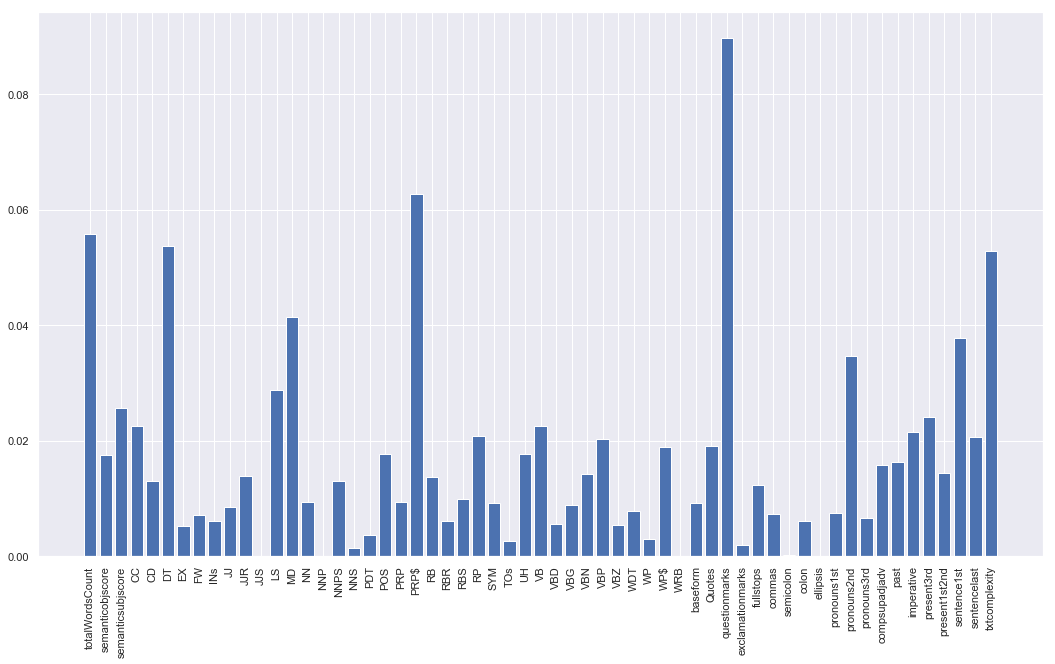

In [25]:
plt.figure(figsize=(18, 10))
plt.bar(list(X),np.array(clf.feature_importances_));
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

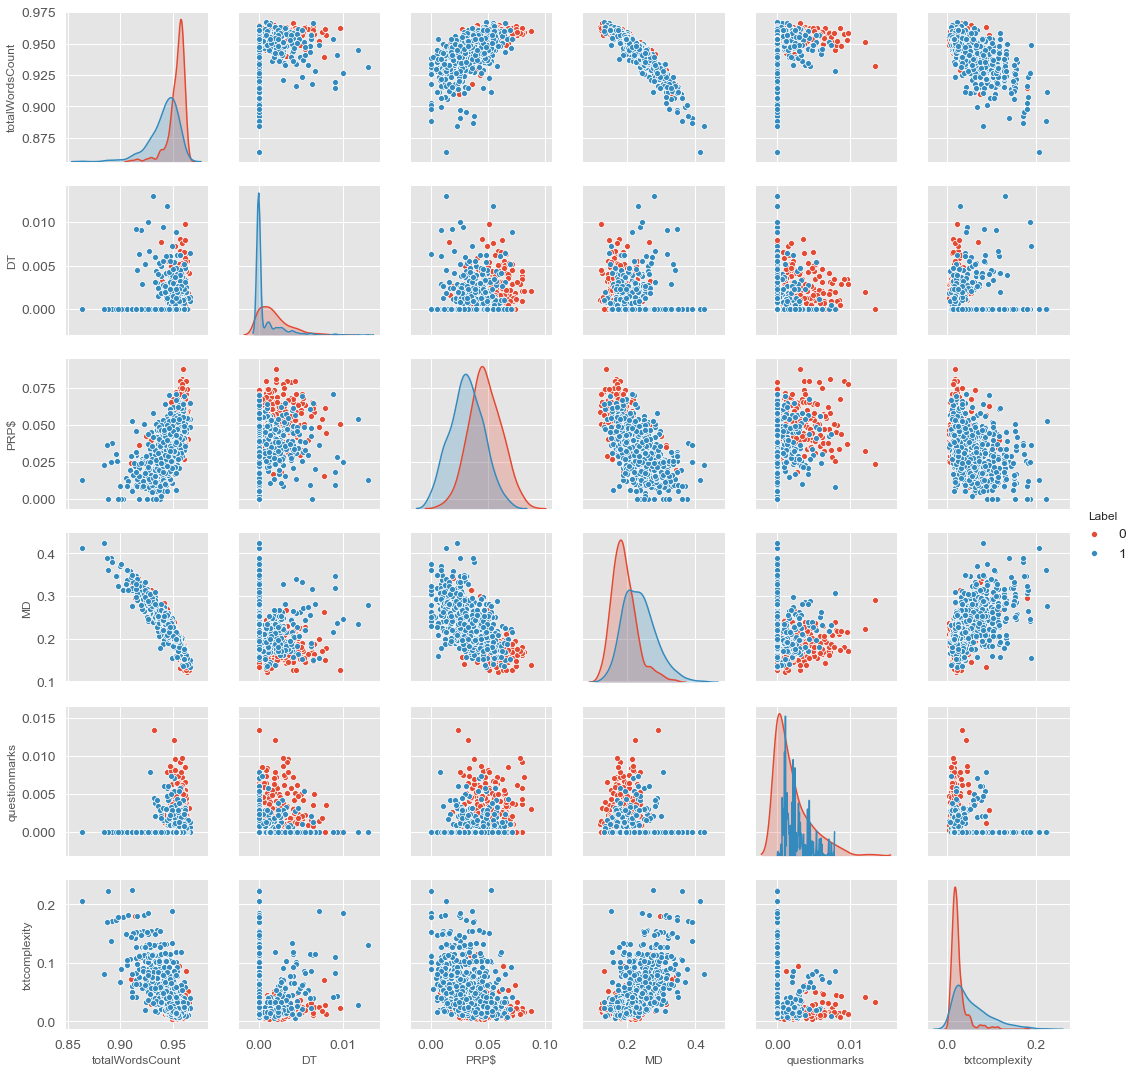

In [59]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

cols = ['totalWordsCount', 'DT', 'PRP$',
        'MD', 'questionmarks', 'txtcomplexity']

sns.pairplot(sport_articles_norm,
             x_vars = cols,
             y_vars = cols,
             hue = 'Label', 
             );

### We can see that it is not enough to take only high-weighted features for classification, because classes are not easily-separated

# We remove parameters with almost zero weight

In [43]:
sport_articles_norm2 = sport_articles_norm.drop(['NNP', 'JJS', 'ellipsis', 'WRB', 'semicolon', 'NNS'], axis=1)
X = sport_articles_norm2.drop('Label', axis=1)
y = sport_articles_norm2.Label

# And now we do grid search again 

In [44]:
t1 = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
param_grid = { 
"n_estimators": np.arange(10, 100, 5),
"min_samples_leaf": [1, 2, 3, 4],
"max_depth": [20, 30, 40, 50]
}
scores = ['accuracy', 'f1_weighted', 'roc_auc']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)

    clf = RandomForestClassifier(random_state=0)

    CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=score)
    CV_rfc.fit(X_train, y_train)
    print (CV_rfc.best_params_)

# Tuning hyper-parameters for accuracy
{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 75}
# Tuning hyper-parameters for f1_weighted
{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 75}
# Tuning hyper-parameters for roc_auc
{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 20}


In [29]:
clf = RandomForestClassifier(n_estimators=75, max_depth = 20, min_samples_leaf=4, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy: ', np.round(accuracy_score(y_pred, y_test)* 100, 3), "%")

clf = RandomForestClassifier(n_estimators=20, max_depth = 20, min_samples_leaf=4, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('roc_auc_score: ', np.round(roc_auc_score(y_pred, y_test)* 100, 3), "%")

clf = RandomForestClassifier(n_estimators=75, max_depth = 20, min_samples_leaf=4, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

accuracy:  83.333 %
roc_auc_score:  82.416 %
f1 score:  82.986 %


## f1 score from 80.9% to 82.9%

# Hyperparameters selection for GradientBoosting

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

t1 = time.time()
param_grid = { 
    "n_estimators": np.arange(10, 100, 5),
    "min_samples_leaf": [1, 2, 3, 4],
    "max_depth": [20, 30, 40, 50]
}
clf = GradientBoostingClassifier(random_state=0)

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1_weighted')
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)
print("time of grid search", str((time.time() - t1) / 60.), "mins")

{'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 90}
time of grid search 13.751546998818716 mins


In [45]:
gb = GradientBoostingClassifier(min_samples_leaf= 4, n_estimators=90, max_depth=20, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

f1 score:  82.394 %


### F1 score in GradientBoost is lower than in random forest
### Lets try SVM classifier

In [46]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['accuracy', 'roc_auc','f1_weighted']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    
    
    warnings.filterwarnings('ignore')

# Tuning hyper-parameters for accuracy
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for roc_auc
Best parameters set found on development set:
{'C': 1000, 'kernel': 'linear'}
# Tuning hyper-parameters for f1_weighted
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}


In [47]:
my_svm = SVC(C=100, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('accuracy: ', np.round(accuracy_score(y_test, y_pred)* 100, 3), "%")

my_svm = SVC(C=1000, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('roc auc: ', np.round(roc_auc_score(y_test, y_pred)* 100, 3), "%")

my_svm = SVC(C=100, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

accuracy:  84.333 %
roc auc:  83.936 %
f1 score:  84.239 %


# Results on classifiing on features obtained from weights:
## RandomForest: 82.9%
## GradientBoost: 82.3 %
## SVM: 84.2%

## Now we want to try PCA to obtain higher score

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16) #we investigated that this number of components is better(higher f1 score)
X = sport_articles_norm.drop(['Label'], axis = 1)
X_pca = pca.fit_transform(X)
principalDf = pd.DataFrame(data = X_pca)
finalDf = pd.concat([principalDf, sport_articles_norm[['Label']]], axis = 1)
X_pca = principalDf 
y_pca = finalDf.Label

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_pca , y_pca, test_size = 0.3, random_state = 0)

In [50]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['accuracy', 'roc_auc','f1_weighted']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    
    
    warnings.filterwarnings('ignore')

# Tuning hyper-parameters for accuracy
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for roc_auc
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}
# Tuning hyper-parameters for f1_weighted
Best parameters set found on development set:
{'C': 100, 'kernel': 'linear'}


In [51]:
my_svm = SVC(C=100, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('accuracy: ', np.round(accuracy_score(y_test, y_pred)* 100, 3), "%")

my_svm = SVC(C=100, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('roc auc: ', np.round(roc_auc_score(y_test, y_pred)* 100, 3), "%")

my_svm = SVC(C=100, kernel="linear", probability=True)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(X_test)
print('f1 score: ', np.round(f1_score(y_test, y_pred, average='weighted')* 100, 3), "%")

accuracy:  84.667 %
roc auc:  83.424 %
f1 score:  84.589 %


### So we obtained higher score, but it still lower than our first approach (84.9%) 

# Conclusion:
### 1. According to the results, our classifier (SVM) with deleting of high-correlated parameters shows that subjectivity or objectivity of sport article can be predicted with score 84.9%. 
### 2. Deleting of too many features leads to lower score of classification, but it is still quite high (81.1%). Probably, we need more data for this kind of analysis.
### 3. The best ML classifier from tested (RandomForest ,GradientBoosting and SVM) for our dataset is SVM as it less time-consuming and gives higher score.
### 4. We would like to make this dataset more complete by adding new features, but we didnt have enough time.
### 5. In our opinion this analysis can be used for futher research but our solution cant be used for complete solving of described problem.